In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import os

In [2]:
epochs = 5#학습 횟수
batch_size=676
test_batch_size = 676
learning_rate = 0.005
momentum = 0.5
no_cuda = True
log_interval = 10

random_seed = 1

torch.manual_seed(random_seed)
use_cuda = not no_cuda and torch.cuda.is_available()

device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [3]:
print_data = pd.read_csv(r'C:\Users\dorit\anaconda3\data\Aeye\KHMtest2_5x5.csv')
#csv파일을 불러오기. 각자의 폴더 위치에 맞게 조정

#데이터 확인
data_position = print_data.iloc[:, 0]
data_position = np.asarray(data_position)
Sensor = print_data.iloc[:, 1:]
Sensor = np.asarray(Sensor)
print('position shape: {}'.format(data_position.shape))
print('position 4 Sensor: {}'.format(data_position[:4]))
print('Sensor shape: {}'.format(Sensor.shape))
print('First 4 Sensor: {}'.format(Sensor[:4]))


position shape: (75712,)
position 4 Sensor: [0 0 0 0]
Sensor shape: (75712, 5)
First 4 Sensor: [[ 655  650  652 1546 1524]
 [ 658  653  528 1522 1513]
 [ 660  648  644 1507 1492]
 [ 659  650  633 1490 1474]]


In [4]:
#Dataest 설정
class Dataset(Dataset):
    def __init__(self): 
        self.len = data_position.shape[0]
        self.x_data = torch.from_numpy(Sensor)
        self.y_data = torch.from_numpy(data_position)


        
    def __getitem__(self, index): 
        return self.x_data[index], self.y_data[index]
    
    def __len__(self): 
        return self.len 
    
dataset1 = Dataset() 
train_loader = DataLoader(dataset=dataset1, batch_size=676, shuffle=True, **kwargs)

test_loader = DataLoader(dataset=dataset1, batch_size=676, shuffle=True, **kwargs)

In [5]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
example_data.shape

torch.Size([676, 5])

In [7]:
#Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 200)
        self.fc2 = nn.Linear(200, 300)
        self.fc3 = nn.Linear(300, 500)
        self.fc4 = nn.Linear(500, 400)
        self.fc5 = nn.Linear(400, 300)
        self.fc6 = nn.Linear(300, 5*5)

        self.sigmoid = nn.Sigmoid()
        self.bn1 = nn.BatchNorm1d(200)
        self.bn2 = nn.BatchNorm1d(300)
        self.bn3 = nn.BatchNorm1d(500)
        self.bn4 = nn.BatchNorm1d(400)
        self.bn5 = nn.BatchNorm1d(300)

    def forward(self, x):
        x = self.sigmoid(self.bn1(self.fc1(x)))
        x = self.sigmoid(self.bn2(self.fc2(x)))
        x = self.sigmoid(self.bn3(self.fc3(x)))
        x = self.sigmoid(self.bn4(self.fc4(x)))
        x = self.sigmoid(self.bn5(self.fc5(x)))
        y_pred = self.sigmoid(self.fc6(x))
        return y_pred
model = Net()

In [8]:
#Optimizer 설정
criterion = nn.MSELoss(size_average = True, reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Model's state_dict:
fc1.weight 	 torch.Size([200, 5])
fc1.bias 	 torch.Size([200])
fc2.weight 	 torch.Size([300, 200])
fc2.bias 	 torch.Size([300])
fc3.weight 	 torch.Size([500, 300])
fc3.bias 	 torch.Size([500])
fc4.weight 	 torch.Size([400, 500])
fc4.bias 	 torch.Size([400])
fc5.weight 	 torch.Size([300, 400])
fc5.bias 	 torch.Size([300])
fc6.weight 	 torch.Size([25, 300])
fc6.bias 	 torch.Size([25])
bn1.weight 	 torch.Size([200])
bn1.bias 	 torch.Size([200])
bn1.running_mean 	 torch.Size([200])
bn1.running_var 	 torch.Size([200])
bn1.num_batches_tracked 	 torch.Size([])
bn2.weight 	 torch.Size([300])
bn2.bias 	 torch.Size([300])
bn2.running_mean 	 torch.Size([300])
bn2.running_var 	 torch.Size([300])
bn2.num_batches_tracked 	 torch.Size([])
bn3.weight 	 torch.Size([500])
bn3.bias 	 torch.Size([500])
bn3.running_mean 	 torch.Size([500])
bn3.running_var 	 torch.Size([500])
bn3.num_batches_tracked 	 torch.Size([])
bn4.weight 	 torch.Size([400])
bn4.bias 	 torch.Size([400])
bn4.running_

C:\Users\dorit\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [9]:
print_data_check = pd.read_csv(r'C:\Users\dorit\anaconda3\data\Aeye\KHMtest2_5x5_Check.csv')
#Check 을 위한 csv파일을 불러오기. 각자의 폴더 위치에 맞게 조정

#데이터 확인
data_position_check = print_data_check.iloc[:, 0]
data_position_check = np.asarray(data_position_check)
Sensor_check = print_data_check.iloc[:, 1:]
Sensor_check = np.asarray(Sensor_check)

In [10]:
#checking을 위한 테스트 dataset 구축
class Dataset(Dataset):
    def __init__(self): 
        self.len = data_position_check.shape[0]
        self.x_data = torch.from_numpy(Sensor_check)
        self.y_data = torch.from_numpy(data_position_check)


        
    def __getitem__(self, index): 
        return self.x_data[index], self.y_data[index]
    
    def __len__(self): 
        return self.len 
    
dataset3 = Dataset() 
train_loader_check = DataLoader(dataset=dataset3, batch_size=676, shuffle=False, **kwargs)

In [11]:
#check 한 Pred 값과 실제 Label값 비교

for i, data in enumerate(train_loader_check): 
    # get the inputs 
    inputs, labels = data 
    # wrap them in Variable 
    inputs, labels = Variable(inputs), Variable(labels) 
    # Forward pass: Compute predicted y by passing x to the model 
    print(inputs.size())
    y_pred = model(inputs.float())
    print(y_pred.size())
    for j in range(11):
        print("Pred is ", "(",(torch.argmax(y_pred[j])+1)//5," , ",(torch.argmax(y_pred[j])+1)%5, "Real Label is", labels[j])

    # Compute and print loss 


torch.Size([11, 5])
torch.Size([11, 25])
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(5)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(10)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(7)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(8)
Pred is  ( tensor(1)  ,  tensor(1) Real Label is tensor(6)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(19)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(17)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(18)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(24)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(20)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(21)


In [12]:
#train 1번째 방법, 2번째 방법 사용시 이부분 스킵혹은 주석처리
new_labels = torch.zeros(676, 25)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
for epoch in range(1,epochs+1): 
    for i, data in enumerate(train_loader): 
        # get the inputs 
        inputs, labels = data 

        # wrap them in Variable 
        inputs, labels = Variable(inputs), Variable(labels) 
        for j in range(676):
            for k in range(25):
                new_labels[labels[j], labels[k]] = 1
        # Forward pass: Compute predicted y by passing x to the model 
        y_pred = model(inputs.float()) 
        # Compute and print loss 
        loss = criterion(y_pred, new_labels.float()) 
        print(epoch, i, loss.data)
        
        # Zero gradients, perform a backward pass, and update the weights. 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        train_losses.append(loss.item())

1 0 tensor(0.2709)
1 1 tensor(0.2700)
1 2 tensor(0.2683)
1 3 tensor(0.2674)
1 4 tensor(0.2656)
1 5 tensor(0.2639)
1 6 tensor(0.2624)
1 7 tensor(0.2609)
1 8 tensor(0.2591)
1 9 tensor(0.2574)
1 10 tensor(0.2559)
1 11 tensor(0.2540)
1 12 tensor(0.2526)
1 13 tensor(0.2510)
1 14 tensor(0.2494)
1 15 tensor(0.2478)
1 16 tensor(0.2462)
1 17 tensor(0.2447)
1 18 tensor(0.2432)
1 19 tensor(0.2417)
1 20 tensor(0.2401)
1 21 tensor(0.2385)
1 22 tensor(0.2371)
1 23 tensor(0.2356)
1 24 tensor(0.2340)
1 25 tensor(0.2327)
1 26 tensor(0.2312)
1 27 tensor(0.2297)
1 28 tensor(0.2283)
1 29 tensor(0.2270)
1 30 tensor(0.2256)
1 31 tensor(0.2241)
1 32 tensor(0.2227)
1 33 tensor(0.2214)
1 34 tensor(0.2199)
1 35 tensor(0.2186)
1 36 tensor(0.2173)
1 37 tensor(0.2159)
1 38 tensor(0.2145)
1 39 tensor(0.2132)
1 40 tensor(0.2119)
1 41 tensor(0.2105)
1 42 tensor(0.2094)
1 43 tensor(0.2082)
1 44 tensor(0.2068)
1 45 tensor(0.2056)
1 46 tensor(0.2043)
1 47 tensor(0.2031)
1 48 tensor(0.2019)
1 49 tensor(0.2006)
1 50 tenso

4 74 tensor(0.0627)
4 75 tensor(0.0626)
4 76 tensor(0.0625)
4 77 tensor(0.0624)
4 78 tensor(0.0622)
4 79 tensor(0.0622)
4 80 tensor(0.0621)
4 81 tensor(0.0620)
4 82 tensor(0.0619)
4 83 tensor(0.0617)
4 84 tensor(0.0619)
4 85 tensor(0.0616)
4 86 tensor(0.0615)
4 87 tensor(0.0616)
4 88 tensor(0.0615)
4 89 tensor(0.0614)
4 90 tensor(0.0613)
4 91 tensor(0.0612)
4 92 tensor(0.0612)
4 93 tensor(0.0610)
4 94 tensor(0.0610)
4 95 tensor(0.0609)
4 96 tensor(0.0609)
4 97 tensor(0.0607)
4 98 tensor(0.0607)
4 99 tensor(0.0607)
4 100 tensor(0.0605)
4 101 tensor(0.0604)
4 102 tensor(0.0604)
4 103 tensor(0.0603)
4 104 tensor(0.0602)
4 105 tensor(0.0602)
4 106 tensor(0.0601)
4 107 tensor(0.0600)
4 108 tensor(0.0600)
4 109 tensor(0.0599)
4 110 tensor(0.0598)
4 111 tensor(0.0597)
5 0 tensor(0.0596)
5 1 tensor(0.0596)
5 2 tensor(0.0595)
5 3 tensor(0.0594)
5 4 tensor(0.0593)
5 5 tensor(0.0593)
5 6 tensor(0.0593)
5 7 tensor(0.0591)
5 8 tensor(0.0590)
5 9 tensor(0.0590)
5 10 tensor(0.0589)
5 11 tensor(0.0589

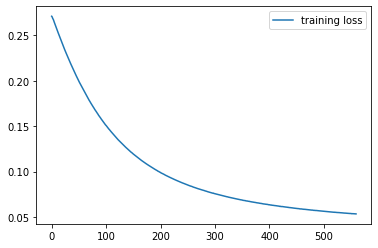

In [13]:
plt.plot(train_losses, label='training loss')
plt.legend()

In [14]:
print_data_check = pd.read_csv(r'C:\Users\dorit\anaconda3\data\Aeye\KHMtest2_5x5_Check.csv')
#Check 을 위한 csv파일을 불러오기. 각자의 폴더 위치에 맞게 조정

#데이터 확인
data_position_check = print_data_check.iloc[:, 0]
data_position_check = np.asarray(data_position_check)
Sensor_check = print_data_check.iloc[:, 1:]
Sensor_check = np.asarray(Sensor_check)

In [15]:
#checking을 위한 테스트 dataset 구축
class Dataset(Dataset):
    def __init__(self): 
        self.len = data_position_check.shape[0]
        self.x_data = torch.from_numpy(Sensor_check)
        self.y_data = torch.from_numpy(data_position_check)


        
    def __getitem__(self, index): 
        return self.x_data[index], self.y_data[index]
    
    def __len__(self): 
        return self.len 
    
dataset3 = Dataset() 
train_loader_check = DataLoader(dataset=dataset3, batch_size=676, shuffle=False, **kwargs)


In [16]:
#check 한 Pred 값과 실제 Label값 비교

for i, data in enumerate(train_loader_check): 
    # get the inputs 
    inputs, labels = data 
    # wrap them in Variable 
    inputs, labels = Variable(inputs), Variable(labels) 
    # Forward pass: Compute predicted y by passing x to the model 
    print(inputs.size())
    y_pred = model(inputs.float())
    print(y_pred.size())
    for j in range(11):
        print("Pred is ", "(",(torch.argmax(y_pred[j])+1)//5," , ",(torch.argmax(y_pred[j])+1)%5, "Real Label is", labels[j])

    # Compute and print loss 


torch.Size([11, 5])
torch.Size([11, 25])
Pred is  ( tensor(4)  ,  tensor(0) Real Label is tensor(5)
Pred is  ( tensor(4)  ,  tensor(3) Real Label is tensor(10)
Pred is  ( tensor(2)  ,  tensor(4) Real Label is tensor(7)
Pred is  ( tensor(3)  ,  tensor(3) Real Label is tensor(8)
Pred is  ( tensor(0)  ,  tensor(1) Real Label is tensor(6)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(19)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(17)
Pred is  ( tensor(3)  ,  tensor(4) Real Label is tensor(18)
Pred is  ( tensor(3)  ,  tensor(3) Real Label is tensor(24)
Pred is  ( tensor(4)  ,  tensor(4) Real Label is tensor(20)
Pred is  ( tensor(4)  ,  tensor(0) Real Label is tensor(21)


In [17]:
print_data_wol = pd.read_csv(r'C:\Users\dorit\anaconda3\data\Aeye\KHMtest_without_lenz2_5x5.csv')
#csv파일을 불러오기. 각자의 폴더 위치에 맞게 조정

#데이터 확인
data_position_wol = print_data_wol.iloc[:, 0]
data_position_wol = np.asarray(data_position_wol)
Sensor_wol = print_data_wol.iloc[:, 1:]
Sensor_wol = np.asarray(Sensor_wol)
print('position shape: {}'.format(data_position_wol.shape))
print('position 4 Sensor: {}'.format(data_position_wol[:4]))
print('Sensor shape: {}'.format(Sensor_wol.shape))
print('First 4 Sensor: {}'.format(Sensor_wol[:4]))

position shape: (75712,)
position 4 Sensor: [0 0 0 0]
Sensor shape: (75712, 5)
First 4 Sensor: [[ 660  641  653 1337 1245]
 [ 649  647  648 1328 1247]
 [ 667  650  652 1328 1307]
 [ 653  645  620 1325 1314]]


In [18]:
class Dataset(Dataset):
    def __init__(self): 
        self.len = data_position_wol.shape[0]
        self.x_data = torch.from_numpy(Sensor_wol)
        self.y_data = torch.from_numpy(data_position_wol)


        
    def __getitem__(self, index): 
        return self.x_data[index], self.y_data[index]
    
    def __len__(self): 
        return self.len
    
dataset2 = Dataset() 
train_loader_wol = DataLoader(dataset=dataset2, batch_size=676, shuffle=True, **kwargs)

test_loader_wol = DataLoader(dataset=dataset2, batch_size=676, shuffle=True, **kwargs)

In [19]:
#Model 설정
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(5, 200)
        self.fc2 = nn.Linear(200, 300)
        self.fc3 = nn.Linear(300, 500)
        self.fc4 = nn.Linear(500, 400)
        self.fc5 = nn.Linear(400, 300)
        self.fc6 = nn.Linear(300, 5*5)

        self.sigmoid = nn.Sigmoid()
        self.bn1 = nn.BatchNorm1d(200)
        self.bn2 = nn.BatchNorm1d(300)
        self.bn3 = nn.BatchNorm1d(500)
        self.bn4 = nn.BatchNorm1d(400)
        self.bn5 = nn.BatchNorm1d(300)

    def forward(self, x):
        x = self.sigmoid(self.bn1(self.fc1(x)))
        x = self.sigmoid(self.bn2(self.fc2(x)))
        x = self.sigmoid(self.bn3(self.fc3(x)))
        x = self.sigmoid(self.bn4(self.fc4(x)))
        x = self.sigmoid(self.bn5(self.fc5(x)))
        y_pred = self.sigmoid(self.fc6(x))
        return y_pred
model = Net()

In [20]:
#Optimizer 설정
criterion = nn.MSELoss(size_average = True, reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
fc1.weight 	 torch.Size([200, 5])
fc1.bias 	 torch.Size([200])
fc2.weight 	 torch.Size([300, 200])
fc2.bias 	 torch.Size([300])
fc3.weight 	 torch.Size([500, 300])
fc3.bias 	 torch.Size([500])
fc4.weight 	 torch.Size([400, 500])
fc4.bias 	 torch.Size([400])
fc5.weight 	 torch.Size([300, 400])
fc5.bias 	 torch.Size([300])
fc6.weight 	 torch.Size([25, 300])
fc6.bias 	 torch.Size([25])
bn1.weight 	 torch.Size([200])
bn1.bias 	 torch.Size([200])
bn1.running_mean 	 torch.Size([200])
bn1.running_var 	 torch.Size([200])
bn1.num_batches_tracked 	 torch.Size([])
bn2.weight 	 torch.Size([300])
bn2.bias 	 torch.Size([300])
bn2.running_mean 	 torch.Size([300])
bn2.running_var 	 torch.Size([300])
bn2.num_batches_tracked 	 torch.Size([])
bn3.weight 	 torch.Size([500])
bn3.bias 	 torch.Size([500])
bn3.running_mean 	 torch.Size([500])
bn3.running_var 	 torch.Size([500])
bn3.num_batches_tracked 	 torch.Size([])
bn4.weight 	 torch.Size([400])
bn4.bias 	 torch.Size([400])
bn4.running_

C:\Users\dorit\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [21]:
new_labels_wol = torch.zeros(676, 25)
train_losses_wol = []
train_counter_wol = []
test_losses_wol = []
test_counter_wol = [i*len(train_loader_wol.dataset) for i in range(epochs + 1)]
for epoch in range(1,epochs+1): 
    for i, data in enumerate(train_loader_wol): 
        # get the inputs 
        inputs, labels = data 

        # wrap them in Variable 
        inputs, labels = Variable(inputs), Variable(labels) 
        for j in range(676):
            for k in range(25):
                new_labels[labels[j], labels[k]] = 1
        # Forward pass: Compute predicted y by passing x to the model 
        y_pred = model(inputs.float()) 
        # Compute and print loss 
        loss = criterion(y_pred, new_labels_wol.float()) 
        print(epoch, i, loss.data)
        # Zero gradients, perform a backward pass, and update the weights. 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        train_losses_wol.append(loss.item())

1 0 tensor(0.2602)
1 1 tensor(0.2592)
1 2 tensor(0.2578)
1 3 tensor(0.2562)
1 4 tensor(0.2544)
1 5 tensor(0.2526)
1 6 tensor(0.2508)
1 7 tensor(0.2490)
1 8 tensor(0.2471)
1 9 tensor(0.2454)
1 10 tensor(0.2436)
1 11 tensor(0.2418)
1 12 tensor(0.2400)
1 13 tensor(0.2383)
1 14 tensor(0.2365)
1 15 tensor(0.2348)
1 16 tensor(0.2330)
1 17 tensor(0.2314)
1 18 tensor(0.2296)
1 19 tensor(0.2280)
1 20 tensor(0.2263)
1 21 tensor(0.2246)
1 22 tensor(0.2230)
1 23 tensor(0.2213)
1 24 tensor(0.2197)
1 25 tensor(0.2181)
1 26 tensor(0.2165)
1 27 tensor(0.2149)
1 28 tensor(0.2133)
1 29 tensor(0.2117)
1 30 tensor(0.2102)
1 31 tensor(0.2086)
1 32 tensor(0.2071)
1 33 tensor(0.2056)
1 34 tensor(0.2041)
1 35 tensor(0.2027)
1 36 tensor(0.2011)
1 37 tensor(0.1997)
1 38 tensor(0.1982)
1 39 tensor(0.1968)
1 40 tensor(0.1953)
1 41 tensor(0.1939)
1 42 tensor(0.1925)
1 43 tensor(0.1911)
1 44 tensor(0.1897)
1 45 tensor(0.1884)
1 46 tensor(0.1870)
1 47 tensor(0.1856)
1 48 tensor(0.1843)
1 49 tensor(0.1830)
1 50 tenso

4 74 tensor(0.0339)
4 75 tensor(0.0338)
4 76 tensor(0.0337)
4 77 tensor(0.0336)
4 78 tensor(0.0335)
4 79 tensor(0.0334)
4 80 tensor(0.0333)
4 81 tensor(0.0332)
4 82 tensor(0.0331)
4 83 tensor(0.0330)
4 84 tensor(0.0330)
4 85 tensor(0.0329)
4 86 tensor(0.0328)
4 87 tensor(0.0327)
4 88 tensor(0.0326)
4 89 tensor(0.0325)
4 90 tensor(0.0324)
4 91 tensor(0.0323)
4 92 tensor(0.0322)
4 93 tensor(0.0322)
4 94 tensor(0.0321)
4 95 tensor(0.0320)
4 96 tensor(0.0319)
4 97 tensor(0.0318)
4 98 tensor(0.0317)
4 99 tensor(0.0316)
4 100 tensor(0.0315)
4 101 tensor(0.0315)
4 102 tensor(0.0314)
4 103 tensor(0.0313)
4 104 tensor(0.0312)
4 105 tensor(0.0312)
4 106 tensor(0.0311)
4 107 tensor(0.0310)
4 108 tensor(0.0309)
4 109 tensor(0.0308)
4 110 tensor(0.0307)
4 111 tensor(0.0307)
5 0 tensor(0.0306)
5 1 tensor(0.0305)
5 2 tensor(0.0304)
5 3 tensor(0.0303)
5 4 tensor(0.0303)
5 5 tensor(0.0302)
5 6 tensor(0.0301)
5 7 tensor(0.0300)
5 8 tensor(0.0300)
5 9 tensor(0.0299)
5 10 tensor(0.0298)
5 11 tensor(0.0297

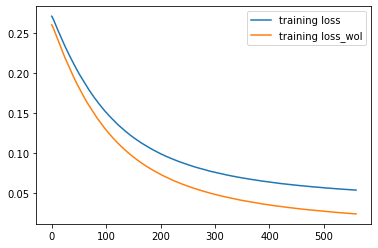

In [22]:
plt.plot(train_losses, label='training loss')
plt.plot(train_losses_wol, label='training loss_wol')
plt.legend()